# Erste Versuche:

In [15]:
class Block:
    def __init__(self, index, pos, lambda_material, temp, name, color):
        self.index = index
        self.pos = pos  # (i, j)
        self.lambda_material = lambda_material
        self.temp = temp
        self.name = name
        self.color = color

class CopperBlock(Block):
    def __init__(self, index, pos, temp):
        super().__init__(index, pos, 380, temp, 'copper', 'lightcoral')

class PVCBlock(Block):
    def __init__(self, index, pos, temp):
        super().__init__(index, pos, 0.23, temp, 'pvc', 'white')


In [2]:
import sympy as sp

# Symbolische Variable
x = sp.Symbol('x')

# Rechte Seite der Differentialgleichung
f = sp.pi**2 * sp.sin(sp.pi * x)

# Anzeige
f


pi**2*sin(pi*x)

In [3]:
# Unbekannte Funktion u(x)
u = sp.Function('u')

# Differentialgleichung: -u''(x) = f(x)
dgl = sp.Eq(-sp.diff(u(x), x, x), f)

# Lösung der DGL mit Dirichlet-Randbedingungen
loesung = sp.dsolve(dgl, u(x), ics={u(0): 0, u(1): 0})

loesung


Eq(u(x), sin(pi*x))

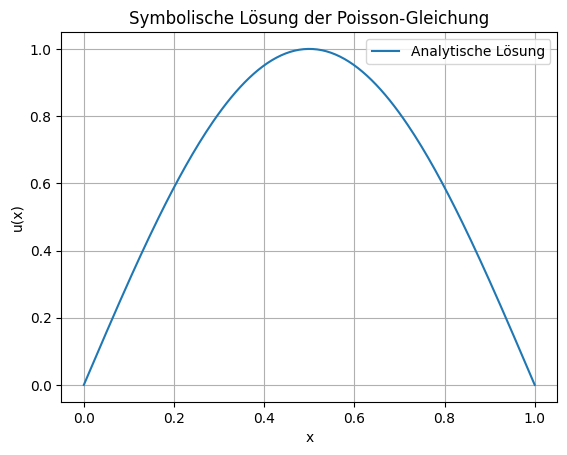

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Lösung umwandeln in eine Python-Funktion
u_analytisch = sp.lambdify(x, loesung.rhs, 'numpy')

# x-Werte und y-Werte berechnen
x_vals = np.linspace(0, 1, 200)
y_vals = u_analytisch(x_vals)

# Plot
plt.plot(x_vals, y_vals, label='Analytische Lösung')
plt.title("Symbolische Lösung der Poisson-Gleichung")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import sympy as sp

# Variablen
x, y = sp.symbols('x y')

# Funktion und rechte Seite
u = sp.Function('u')(x, y)
f = 2 * sp.pi**2 * sp.sin(sp.pi*x)*sp.sin(sp.pi*y)

# 2D-Poisson-Gleichung
dgl = sp.Eq(- (sp.diff(u, x, 2) + sp.diff(u, y, 2)), f)
dgl


Eq(-Derivative(u(x, y), (x, 2)) - Derivative(u(x, y), (y, 2)), 2*pi**2*sin(pi*x)*sin(pi*y))

In [6]:
u_exact = sp.sin(sp.pi*x)*sp.sin(sp.pi*y)


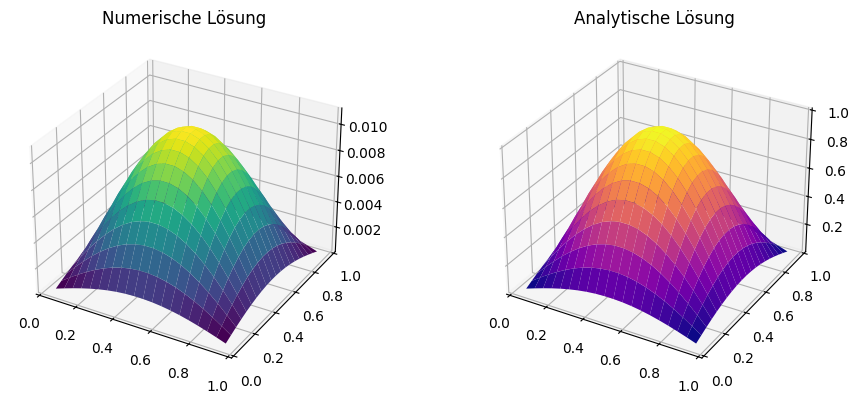

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 20
h = 1.0 / (N + 1)
x = np.linspace(h, 1-h, N)
y = np.linspace(h, 1-h, N)
X, Y = np.meshgrid(x, y)

# Rechte Seite f(x, y)
f = 2 * np.pi**2 * np.sin(np.pi * X) * np.sin(np.pi * Y)
f = f.reshape(N*N)

# Matrix A für 2D-Laplace
I = np.eye(N)
T = np.diag([-4]*N) + np.diag([1]*(N-1), -1) + np.diag([1]*(N-1), 1)
A = np.kron(I, T) + np.kron(T, I)
A = A / h**2

# Lösung des Gleichungssystems
u_num = np.linalg.solve(-A, f)

# In 2D-Form bringen
u_grid = u_num.reshape(N, N)

# Analytische Lösung
u_exact = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Plot
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, u_grid, cmap='viridis')
ax1.set_title("Numerische Lösung")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, u_exact, cmap='plasma')
ax2.set_title("Analytische Lösung")

plt.tight_layout()
plt.show()


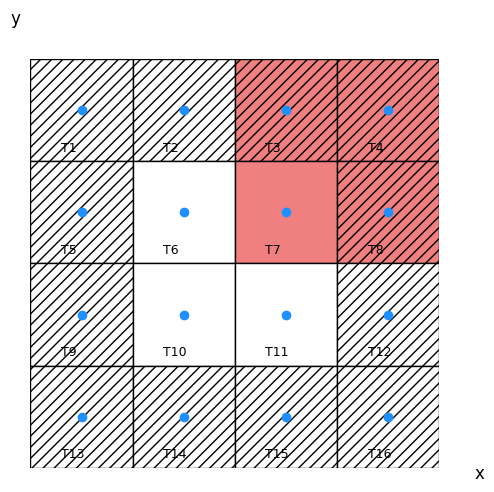

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(rows):
    for j in range(cols):
        block = blocks[i][j]

        # Schraffur nur bei Randblöcken
        is_edge = i == 0 or i == rows - 1 or j == 0 or j == cols - 1
        hatch = '///' if is_edge else None

        # Rechteck zeichnen
        rect = plt.Rectangle((j, rows - 1 - i), 1, 1,
                             facecolor=block.color,
                             edgecolor='black',
                             hatch=hatch)
        ax.add_patch(rect)

        # Temperaturpunkt
        ax.plot(j + 0.5, rows - 1 - i + 0.5, 'o', color='dodgerblue')

        # Beschriftung mit T_i
        ax.text(j + 0.3, rows - 1 - i + 0.1, f"T{block.index}", fontsize=9)

# Achsenpfeile
ax.annotate('', xy=(cols + 0.3, 0), xytext=(cols, 0),
            arrowprops=dict(facecolor='black', width=1.5))
ax.annotate('', xy=(0, rows + 0.3), xytext=(0, rows),
            arrowprops=dict(facecolor='black', width=1.5))
ax.text(cols + 0.35, -0.1, 'x', fontsize=12)
ax.text(-0.2, rows + 0.35, 'y', fontsize=12)

ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.show()


# Aufgabe 1


## Aus dem Skript

- Zustandsgrößen:
- Intensive Größen: Unabhängig von der Systemgröße (z. B. Temperatur $T$, Druck $p$ ).
- Extensive Größen: Proportional zur Systemgröße (z. B. Masse $m$, Energie $U$ ).
- Zusammenhang: $\rho=\frac{m}{V}$ (Dichte als intensive Größe).
- Integrale Transportgleichung:

Beschreibt die zeitliche Änderung einer extensiven Größe $\varepsilon$ in einem Bilanzgebiet $\Omega_t$ :

$$
\frac{d}{d t} \int_{\Omega_t} \Phi d \Omega=-\oint_{\Gamma_t}[\Phi(\vec{v}-\vec{u})+\dot{\vec{q}}] \cdot \vec{n} d \Gamma+\int_{\Omega_t} \pi d \Omega
$$

wobei $\Phi$ die volumenspezifische intensive Größe, $\dot{\vec{q}}$ die diffuse Flussdichte und $\pi$ die Quelldichte ist.
- Spezialfall ruhender Festkörper:
$\vec{u}=\vec{v}=0$ (keine Bewegung), vereinfacht zu:

$$
\frac{d}{d t} \int_{\Omega_t} \Phi d \Omega=-\oint_{\Gamma_t} \dot{\vec{q}} \cdot \vec{n} d \Gamma+\int_{\Omega_t} \pi d \Omega
$$

- Fouriersches Gesetz:

Die Wärmestromdichte $\dot{\vec{q}}$ ist proportional zum negativen Temperaturgradienten:

$$
\dot{\vec{q}}=-\lambda \nabla T,
$$

wobei $\lambda$ die Wärmeleitfähigkeit ist.

In [ ]:
# Das ist nun die erste Formel die in Python übersetzen 
import numpy as np
# Beispielwerte
lambda_ = 200  # Wärmeleitfähigkeit, z.B. Kupfer [W/mK]
x = np.linspace(0, 1, 100)  # Positionen [m]
T = 100 - 50 * x  # Temperaturverlauf, linear abfallend von 100°C auf 50°C

# Temperaturgradient (numerisch approximiert)
dT_dx = np.gradient(T, x)  # ∇T

# Wärmestromdichte nach Fourier
q_dot = -lambda_ * dT_dx  # -λ ∇T

- Innere Energie für Festkörper:

Für inkompressible Festkörper ( $v=$ const.) gilt:

$$
d u=c_v d T \quad \text { mit } \quad c_v=c_p=c \quad \text { (spezifische Wärmekapazität). }
$$


Integration ergibt:

$$
u(T)=u_0+c\left(T-T_0\right)
$$

- Energiebilanz für ruhende Festkörper:

Setze $\Phi=\rho u$ und $\dot{\vec{q}}=-\lambda \nabla T$ in die integrale Transportgleichung ein:

$$
\int_{\Omega_t} \rho c \frac{\partial T}{\partial t} d \Omega=\oint_{\Gamma_t} \lambda \nabla T \cdot \vec{n} d \Gamma+\int_{\Omega_t} \pi d \Omega
$$

- Differentielle Form:

Anwendung des Gaußschen Integralsatzes und Annahme stetiger Integranden liefert:

$$
\rho c \frac{\partial T}{\partial t}=\nabla \cdot(\lambda \nabla T)+\pi
$$


Dies ist die Wärmeleitungsgleichung für Festkörper.
- Stationärer Fall $\left(\frac{\partial T}{\partial t}=0\right)$ :

$$
0=\nabla \cdot(\lambda \nabla T)+\pi
$$

Die Wärmeleitungsgleichung für ruhende, inkompressible Festkörper lautet:

$$
\rho c \frac{\partial T}{\partial t}=\nabla \cdot(\lambda \nabla T)+\pi
$$

- Bedeutung der Terme:
- $\rho c \frac{\partial T}{\partial t}$ : Zeitliche Änderung der inneren Energie.
- $\nabla \cdot(\lambda \nabla T)$ : Diffusiver Wärmetransport (Wärmeleitung).
- $\pi$ : Quellterm (z. B. externe Wärmequellen).

Diese Gleichung beschreibt, wie sich Temperatur in einem Festkörper durch Wärmeleitung und externe Einflüsse zeitlich und räumlich verteilt.

# Aufgabe 2


In [ ]:
rows, cols = 4, 4
blocks = []
index = 1

for i in range(rows):
    row = []
    for j in range(cols):
        # Kupfer oben rechts → i ∈ {0,1}, j ∈ {2,3}
        if i in [0,1] and j in [2,3]:
            block = CopperBlock(index, (i, j), temp=373.15)  # Quelltemperatur
        else:
            block = PVCBlock(index, (i, j), temp=294.15)      # Standard-Randwert (wird ggf. überschrieben)
        row.append(block)
        index += 1
    blocks.append(row)

# T10 ist innere Dirichlet-Bedingung
blocks[2][1].temp = 373.15  # T10 = Zeile 3, Spalte 2 (0-indiziert → [2][1])



In [25]:
n = 6
rn = row_len = len(blocks[0])
T_p = blocks[n%rn][n//rn]
T_n = blocks[(n+rn)%rn][n//rn]
T_s = blocks[(n-rn)%rn][n//rn]
T_e = blocks[n%rn][(n+1)//rn]
T_w = blocks[n%rn][(n-1)//rn]

T = [T_p.temp, T_n.temp, T_s.temp, T_e.temp, T_w.temp]
T = np.array(T)
T

array([20., 20., 20., 20., 20.])

In [26]:
lambda_p = T_p.lambda_material
lambda_n = 2*(1/lambda_p + 1/T_n.lambda_material)**(-1)
lambda_s = 2*(1/lambda_p + 1/T_s.lambda_material)**(-1)
lambda_e = 2*(1/lambda_p + 1/T_e.lambda_material)**(-1)
lambda_w = 2*(1/lambda_p + 1/T_w.lambda_material)**(-1)
a_n = lambda_n
a_s = lambda_s
a_e = lambda_e
a_w = lambda_w
a_p = - (a_n + a_s + a_e + a_w)

A = [a_p, a_n, a_s, a_e, a_w]
A = np.array(A)
A

array([-0.92,  0.23,  0.23,  0.23,  0.23])

In [28]:
S = A*T
S

array([-18.4,   4.6,   4.6,   4.6,   4.6])

In [29]:

n = 6
rn = row_len = len(blocks[0])  # 4

# Zeile und Spalte für Index n (1-basiert!)
i = (n - 1) // rn
j = (n - 1) % rn

T_p = blocks[i][j]

# Funktion für Randprüfung
def is_on_edge(i, j, rows, cols):
    return i == 0 or j == 0 or i == rows - 1 or j == cols - 1

# Nachbarn holen – falls am Rand → Dirichlet-Wert verwenden
def get_T(i, j):
    if is_on_edge(i, j, rows, cols):
        # Quellrand (Kupfer, oben rechts)
        if i in [0,1] and j in [2,3]:
            return 373.15
        else:
            return 294.15
    else:
        return blocks[i][j].temp

def get_lambda(i, j):
    if is_on_edge(i, j, rows, cols):
        # Angenommene Umgebung mit gleichem Material wie innen
        return blocks[i][j].lambda_material if 0 <= i < rows and 0 <= j < cols else T_p.lambda_material
    else:
        return blocks[i][j].lambda_material

# T-Werte der Nachbarn
T_n = get_T(i - 1, j)
T_s = get_T(i + 1, j)
T_e = get_T(i, j + 1)
T_w = get_T(i, j - 1)

T_vec = np.array([T_p.temp, T_n, T_s, T_e, T_w])

# Lambda-Werte der Nachbarn (harmonisches Mittel)
lambda_p = T_p.lambda_material
lambda_n = 2 / (1/lambda_p + 1/get_lambda(i - 1, j))
lambda_s = 2 / (1/lambda_p + 1/get_lambda(i + 1, j))
lambda_e = 2 / (1/lambda_p + 1/get_lambda(i, j + 1))
lambda_w = 2 / (1/lambda_p + 1/get_lambda(i, j - 1))

# Koeffizienten
a_n = lambda_n
a_s = lambda_s
a_e = lambda_e
a_w = lambda_w
a_p = - (a_n + a_s + a_e + a_w)

A_vec = np.array([a_p, a_n, a_s, a_e, a_w])

# Rechter Seitenwert S
S = A_vec @ T_vec
print("S =", S)


S = 126.10900000000001


Temperaturverteilung (K):
 [[294.15       294.15       373.15       373.15      ]
 [294.15       341.54235225 373.15       373.15      ]
 [294.15       373.15       341.54235225 294.15      ]
 [294.15       294.15       294.15       294.15      ]]


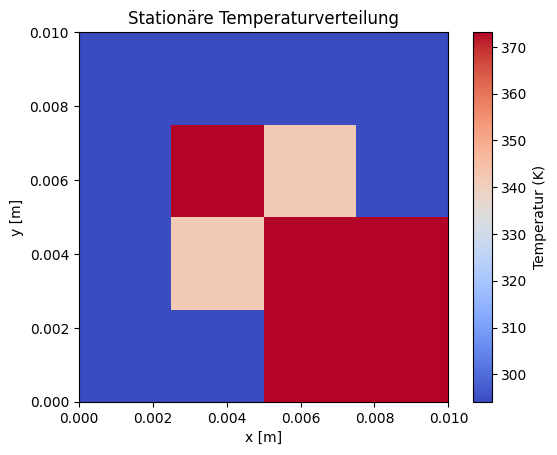

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
import math

# ==== Parameter definieren ====
n = 4  # Gittergröße n x n
N = n * n
L = 0.01  # Plattengröße (10 mm)
dx = dy = L / n
V = dx * dy

# Materialkonstanten
lambda_pvc = 0.23
lambda_cu = 380.0
Q_val = math.pi

# Temperaturwerte (in Kelvin)
T_dirichlet = 294.15
T_quelle = 373.15
T_innen = 373.15

# ==== Matrizen definieren ====
lambda_matrix = np.full((n, n), lambda_pvc)
Q_matrix = np.zeros((n, n))
T_fix = np.full((n, n), np.nan)  # NaN = kein fester Wert

# Kupferquelle oben rechts (oberes rechtes Viertel)
lambda_matrix[:n//2, n//2:] = lambda_cu
Q_matrix[:n//2, n//2:] = Q_val
T_fix[:n//2, n//2:] = T_quelle  # Dirichlet-Bedingung in Quelle

# Randbedingungen (Dirichlet, keine Quelle)
T_fix[0, :] = np.where(np.isnan(T_fix[0, :]), T_dirichlet, T_fix[0, :])
T_fix[-1, :] = np.where(np.isnan(T_fix[-1, :]), T_dirichlet, T_fix[-1, :])
T_fix[:, 0] = np.where(np.isnan(T_fix[:, 0]), T_dirichlet, T_fix[:, 0])
T_fix[:, -1] = np.where(np.isnan(T_fix[:, -1]), T_dirichlet, T_fix[:, -1])

# Innere Dirichlet-Bedingung: T10 = 373.15 K (Zelle 10 → [2,1])
T_fix[2, 1] = T_innen

# ==== Hilfsfunktionen ====
def idx(i, j): return i * n + j
def harmonic_mean(a, b): return 2 * a * b / (a + b) if a + b > 0 else 0

# ==== Systemmatrix A und rechter Vektor S ====
A = lil_matrix((N, N))
S = np.zeros(N)

for i in range(n):
    for j in range(n):
        k = idx(i, j)

        if not np.isnan(T_fix[i, j]):
            # Dirichlet-Knoten
            A[k, k] = 1.0
            S[k] = T_fix[i, j]
            continue

        # Materialeigenschaft und Quelle
        lp = lambda_matrix[i, j]
        qp = Q_matrix[i, j]
        s = 0.0
        aN = aS = aE = aW = 0.0

        # Nachbarn prüfen
        if i > 0:  # Norden
            ln = lambda_matrix[i - 1, j]
            aN = harmonic_mean(lp, ln)
            if np.isnan(T_fix[i - 1, j]):
                A[k, idx(i - 1, j)] = aN
            else:
                s += aN * T_fix[i - 1, j]

        if i < n - 1:  # Süden
            ls = lambda_matrix[i + 1, j]
            aS = harmonic_mean(lp, ls)
            if np.isnan(T_fix[i + 1, j]):
                A[k, idx(i + 1, j)] = aS
            else:
                s += aS * T_fix[i + 1, j]

        if j < n - 1:  # Osten
            le = lambda_matrix[i, j + 1]
            aE = harmonic_mean(lp, le)
            if np.isnan(T_fix[i, j + 1]):
                A[k, idx(i, j + 1)] = aE
            else:
                s += aE * T_fix[i, j + 1]

        if j > 0:  # Westen
            lw = lambda_matrix[i, j - 1]
            aW = harmonic_mean(lp, lw)
            if np.isnan(T_fix[i, j - 1]):
                A[k, idx(i, j - 1)] = aW
            else:
                s += aW * T_fix[i, j - 1]

        aP = -(aN + aS + aE + aW)
        A[k, k] = aP
        S[k] = -qp * V - s

# ==== Gleichung lösen ====
T_vec = spsolve(A.tocsr(), S)
T_mat = T_vec.reshape((n, n))

# ==== Ausgabe ====
print("Temperaturverteilung (K):\n", T_mat)

plt.imshow(T_mat, origin='lower', cmap='coolwarm', extent=[0, L, 0, L])
plt.colorbar(label="Temperatur (K)")
plt.title("Stationäre Temperaturverteilung")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid(False)
plt.show()
